In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from scipy import stats
from os.path import join
from geopy.distance import geodesic
import reverse_geocoder as rg

%matplotlib inline

#Reading the file and add the columns.

df = pd.read_csv("taxi-trips.csv", delimiter= ',')

In [22]:
n_rows, n_columns=df.shape
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [23]:
#Descriptive statistics that summarize the columns

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [24]:
#Data types 
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [25]:
#Function which takes the hour value as a parameter and returns the appropriate string to it. 

def timeassignment(hour):
    if hour>= 7 and hour < 9:
        return "rush_hour_morning"
    elif hour >=9 and hour <16:
        return "afternoon"
    elif hour >=16 and hour <18:
        return "rush_hour_evening"
    elif hour >=18 and hour <23:
        return "evening"
    else:
        return "late_night"

In [26]:
#
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])  # convert back to datetime
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"]) 
df["hour"]=df["pickup_datetime"].dt.hour #Taking the necessary hour part. 


#Call the function.
df["time_of_day"]= df["hour"].apply(timeassignment)
df.head()

df = df.drop('hour', 1)
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,afternoon


In [27]:
#Reverse geocoding for pickup_districts:

listforpickup=[]
coordinate = df[['pickup_latitude', 'pickup_longitude']].values
#df['coord']=(tuple(coordinate))
for i in coordinate:
    listforpickup.append(tuple(i))

#df.head()


In [28]:
#Applying reverse geocoding to coordinates.Listforpickup is a list which contains all coordinates.
districtplace = rg.search(listforpickup)


In [29]:
#Taking the name part to the pick_districts colums.
pdistricts=[]
for a in districtplace:
    pdistricts.append(a['name'])

df['pickup_districts']=pdistricts

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day,pickup_districts
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,rush_hour_evening,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,evening,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,rush_hour_morning,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,afternoon,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,afternoon,New York City


In [30]:
#Reverse geocoding for dropoff_districts:

listfordropoff=[]
coordinate = df[['dropoff_latitude', 'dropoff_longitude']].values

for i in coordinate:
    listfordropoff.append(tuple(i))

districtplace = rg.search(listfordropoff)
ddistricts=[]
for a in districtplace:
    ddistricts.append(a['name'])
    
df['dropoff_districts']=ddistricts
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day,pickup_districts,dropoff_districts
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,rush_hour_evening,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,evening,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,rush_hour_morning,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,afternoon,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,afternoon,New York City,New York City


In [31]:
#Calculating the distance and making a column accordingly.
distancee =[]
for i in range(len(listforpickup)):
    distancee.append(geodesic(listforpickup[i], listfordropoff[i]).miles)

In [32]:
#Adding a column called distance.
df['distance']=distancee
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day,pickup_districts,dropoff_districts,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,rush_hour_evening,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,evening,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,rush_hour_morning,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,afternoon,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,afternoon,New York City,New York City,1.562103


In [33]:
#number of pickup_district repeated
df['pickup_districts'].value_counts()[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_districts, dtype: int64

In [34]:
#number of dropoff_district repeated
df['dropoff_districts'].value_counts()[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_districts, dtype: int64

In [35]:
#Creating lists, so that we could compute all average of all time_of_day values in order to compare them according to their distances.

rush_hour_morning=[]
afternoon=[]
rush_hour_evening=[]
evening=[]
late_night=[]

timevalues=[]
timevalues=df['time_of_day'].values

distancevalues=[]
distancevalues=df['distance'].values

for i in range(len(timevalues)-1):
    if timevalues[i]=="rush_hour_morning":
        rush_hour_morning.append(distancevalues[i])
    elif timevalues[i]=="afternoon":
        afternoon.append(distancevalues[i])
    elif timevalues[i]=="rush_hour_evening":
        rush_hour_evening.append(distancevalues[i]) 
    elif timevalues[i]== "evening":
        evening.append(distancevalues[i])
    else:
        late_night.append(distancevalues[i])
        
avg_rh_morning=sum(rush_hour_morning)/ float(len(rush_hour_morning))
avg_afternoon=sum(afternoon)/ float(len(afternoon))
avg_rh_evening=sum(rush_hour_evening)/ float(len(rush_hour_evening))
avg_evening=sum(evening)/ float(len(evening))
avg_late_night=sum(late_night)/ float(len(late_night))

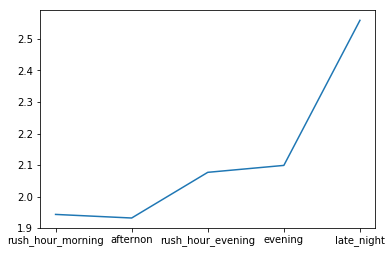

In [36]:
#Show how the average distance varies as time of the day changes
plt.plot(['rush_hour_morning','afternon', 'rush_hour_evening', 'evening', 'late_night'],[avg_rh_morning,avg_afternoon,avg_rh_evening,avg_evening,avg_late_night])

The correlation between the distance and the time values is weak even though it is obvious that the distance travelled at night is higher than othe time values.

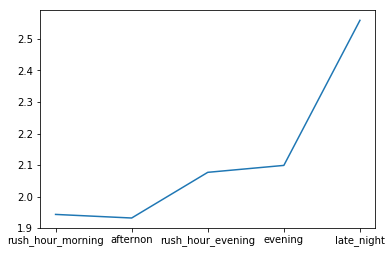

In [37]:
#Creating empty lists so that we can compute the average of the timevalues of trip duration.
duration_rush_hour_morning=[]
duration_afternoon=[]
duration_rush_hour_evening=[]
duration_evening=[]
duration_late_night=[]


duration =[]
duration = df['trip_duration'].values
for i in range(len(timevalues)-1):
    if timevalues[i]=="rush_hour_morning":
        duration_rush_hour_morning.append(duration[i])
    elif timevalues[i]=="afternoon":
        duration_afternoon.append(duration[i])
    elif timevalues[i]=="rush_hour_evening":
        duration_rush_hour_evening.append(duration[i]) 
    elif timevalues[i]== "evening":
        duration_evening.append(duration[i])
    else:
        duration_late_night.append(duration[i])
        
avg_duration_rh_morning=sum(rush_hour_morning)/ float(len(rush_hour_morning))
avg_duration_afternoon=sum(afternoon)/ float(len(afternoon))
avg_duration_rh_evening=sum(rush_hour_evening)/ float(len(rush_hour_evening))
avg_duration_evening=sum(evening)/ float(len(evening))
avg_duration_late_night=sum(late_night)/ float(len(late_night))

plt.plot(['rush_hour_morning','afternon', 'rush_hour_evening', 'evening', 'late_night'],[avg_duration_rh_morning,avg_duration_afternoon,avg_duration_rh_evening,avg_duration_evening,avg_duration_late_night])

According to the graph, we can say that as the day time becomes late the duration of the trip increases such as while the values are between 1.9 and 2.0 when it is rush_hour_morning, the values are almost above 2.5 during late_night.

Null Hypothesis:"passenger group size has no effect on the distance."

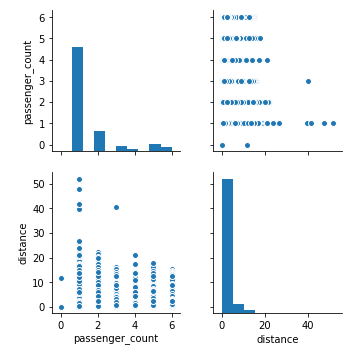

In [38]:
#Applying Pearson Corelation.
columns = ['passenger_count', 'distance']
sns.pairplot(data=df, vars=columns)

In [42]:
#First part is the correlation coefficient and second value is the p-value.

stats.pearsonr(df['passenger_count'], df['distance'])

(0.005969284310211612, 0.04015801711548572)

As the p-value is lower than the significance level, our test is significant. As the corelation coefficient between passenger count and distance is 0.005969284310211612,the corelation is not significant.

Null Hypothesis:"The day of the week has no effect on the distance"

In [43]:
#Constructing a datelist and add the dates to the list.
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])  # convert back to datetime
date=df["pickup_datetime"].dt.date
datelist=[]
for i in range(len(date)-1):
    datelist.append(date[i])

In [44]:
#Construct 2 lists which will contain bothe the distances travelled during week days and weekends.
weekenddist=[]
weekdaydist=[]
for j in range(len(datelist)-1):
    if datelist[j].weekday()==5 or datelist[j].weekday()==6:
        weekenddist.append(distancevalues[j])
    else:
        weekdaydist.append(distancevalues[j])
        
        

In [48]:
#Calculating mean and standard deviation of weekdays which will be used in the t-test.

meanweekday=sum(weekdaydist)/float(len(weekdaydist))
print("Mean is ", meanweekday)
import statistics
stdweekday=statistics.stdev(weekdaydist)
print("Standard deviation is", stdweekday)


Mean is  2.086015848707425
Standard deviation is 2.4119150302306775


In [49]:
#Applying t-test for weekdays.
weekday = np.random.normal(loc=meanweekday, scale=stdweekday, size=len(weekdaydist))
stats.ttest_1samp(weekday, meanweekday)

[ 4.05143355 -1.34685596  1.45661715 ...  8.61647902  4.24577586
  4.4394704 ]


Ttest_1sampResult(statistic=0.2641112010470749, pvalue=0.7916948851129888)

As the p-value of t-test1 is higher than 0.05, we can reject the null hypothesis. 

In [53]:
#Calculating mean and standard deviation for weekends which will be used in the t-test.
meanweekend=sum(weekenddist)/float(len(weekenddist))
print("Mean is" ,meanweekend)
stdweekend=statistics.stdev(weekenddist)
print("Standard deviation is ", stdweekend)


Mean is 2.171986342014479
Standard deviation is  2.3986027583744147


In [54]:
#Applying t-test for weekends.
weekend = np.random.normal(loc=meanweekend, scale=stdweekend, size=len(weekenddist))
stats.ttest_1samp(weekend, meanweekend)


Ttest_1sampResult(statistic=-0.005399634556448212, pvalue=0.9956917669179001)

As the p-value of t-test2 is higher than 0.05, we can reject the null hypothesis. 